In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv


# Women's Clothing Reviews - Sentiment Analysis: EDA

## Overall Project Goal
In this project I want to understand this dataset on women's clothing reviews, create a Word2Vec model based off of the review texts in the data set and then use this Word2Vec model to build a sentiment analysis model on the dataset which attempts to predict whether the customer left a 5-star review or not.

### Project Notebooks
This notebook is part of a series of 3 notebooks on performing sentiment analysis on a dataset of women's clothing reviews.
1. **Women's Clothing Reviews - Sentiment Analysis: EDA**
2. Women's Clothing Reviews - Sentiment Analysis: Building Word2Vec Model **{ADD LINKS}**
3. Women's Clothing Reviews - Sentiment Analysis: Building a Sentiment Analysis Model



## Goal of this notebook: EDA
In this notebook, I want to explore the dataset to get a better understanding of the data. Look more closely at the target variable and also do some very light data cleaning on the original data, removing data that is completely irrelevant to our goal.

---
---
---

## 1. Getting Familiar with the Data

- **Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.
- **Age:** Positive Integer variable of the reviewers age.
- **Title:** String variable for the title of the review.
- **Review Text:** String variable for the review body.
- **Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 -Worst, to 5 Best.
- **Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- **Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.
- **Division Name:** Categorical name of the product high level division.
- **Department Name:** Categorical name of the product department name.
- **Class Name:** Categorical name of the product class name.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Importing the dataset
data = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv', index_col='Unnamed: 0')

In [4]:
# Looking at the first 10 rows of the data
pd.options.display.max_colwidth = 600
data.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typically wear an xs regular in retailer dresses. if you're less busty (34b cup or smaller), a s petite will fit you perfectly (snug, but not tight). i love that i could dress it up for a party, or down for work. i love that the tulle is longer then the fabric underneath.",5,1,0,General,Dresses,Dresses


In [5]:
# General information on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


#### Observations:
- We can see that there are 5 columns of the integer data type and 5 object columns
    - `Clothing ID` is not continuous data (will be changed to object datatype)
    - `Rating` is ordinal data
    - `Recommended IND` is categorical data (will leave as int64 datatype)
- We can see that there is some missing data, we will explore this later

In [6]:
# Changing `Clothing ID` datatype to object
data['Clothing ID'] = data['Clothing ID'].astype(object)

# Renaming `Recommended IND`
data = data.rename(columns={'Recommended IND': 'Recommend'})

### 1.1 Finding Missing Data

We will rigorously deal with missing data in the data cleaning notebook. For now let's look at sources of missing data so that it can be taken into account during EDA and perform simple data cleaning where necessary.

In [7]:
# Looking at the missing data in every column
data.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommend                     0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

**Observations**:
- We can see that the last three columns have some missing data, these columns are not relevent to our project and will be removed in the cleaned dataset anyway.
- We are missing 3810 titles, which is quite a high amount. In the final model we could ignore titles, append them to the full review text, try to feature engineer rows with missing titles etc.
- We are missing 845 reviews. Because we want to perform sentiment analysis on the reviews in the dataset, these rows will be removed from the dataset.

## 2. EDA

### 2.1 EDA: Numerical and Ordinal Variables

Let's look at the distributions for the numerical and ordinal data.

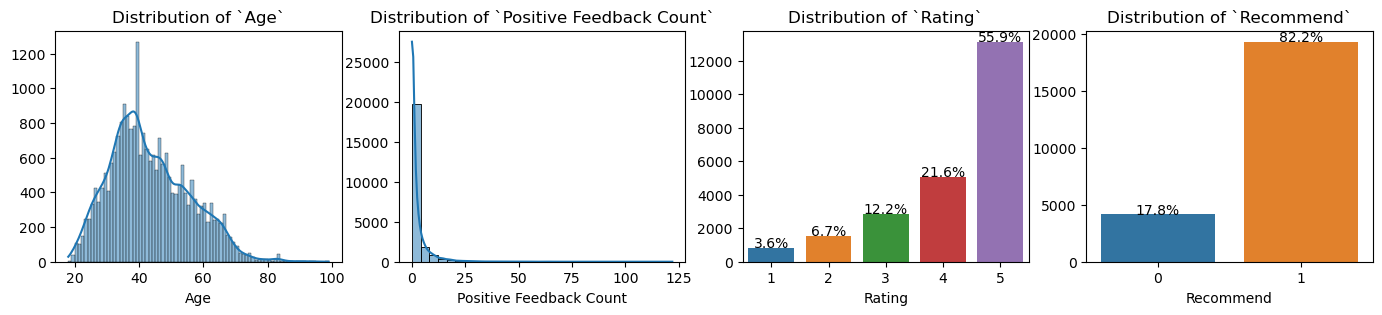

In [8]:
# Defining the numerical and ordinal variables (inclding `Recommend` although it is categorical)
num_cols = ['Age', 'Positive Feedback Count']
ord_cols = ['Rating', 'Recommend']

# Creating the figure
fig = plt.figure(figsize=(17,3))

# Subplot for `Age`
plt.subplot(1,4,1)
sns.histplot(data=data, x='Age', bins=np.ptp(data['Age']), kde=True)
plt.title('Distribution of `Age`')
plt.ylabel('')

# Subplot for `Positive Feedback Count`
plt.subplot(1,4,2)
sns.histplot(data=data, x='Positive Feedback Count', bins=30, kde=True)
plt.title('Distribution of `Positive Feedback Count`')
plt.ylabel('')

# Subplot for `Rating`
plt.subplot(1,4,3)
ax = sns.countplot(data=data, x='Rating')
plt.title('Distribution of `Rating`')
plt.ylabel('')
# Add normalized counts to Rating plot
total = float(len(data['Rating']))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+0.5, '{:.1%}'.format(height/total), ha="center") 

# Subplot for `Recommend`
plt.subplot(1,4,4)
ax = sns.countplot(data=data, x='Recommend')
plt.title('Distribution of `Recommend`')
plt.ylabel('')
# Add normalized counts to Recommend plot
total = float(len(data['Recommend']))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+0.5, '{:.1%}'.format(height/total), ha="center") 

plt.show()


#### Observations:
- The `Age` distribution follows what we would expect for the consumers in the market. The distribution is normal in general, and slightly skewed to the right. This is to be expected as we could assume that younger women tend to do more clothes shopping online.
- The `Positive Feedback Count` distribution is heavily skewed as most reviews do not receive any feedback.
- The `Rating` column shows that most people leave a 5 star rating, and that in general customers tend to leave positive reviews.
- The `Recommend` column shows that the vast majority of reviewers would recommend their purchase.

Let's explore some relationships between these variables further:


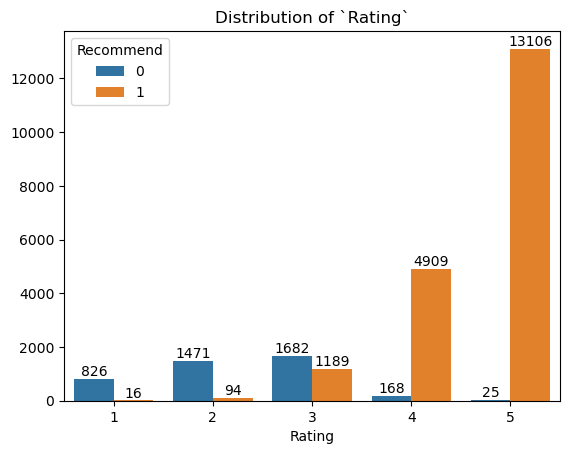

In [9]:
# Bar chart of `Rating` but split by `Recommend`
ax = sns.countplot(data=data, x='Rating', hue='Recommend')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of `Rating`')
plt.ylabel('')

plt.show()

#### Observations:
 - Here we can see that the vast majority of customers that review an item either 4 or 5 stars would recommend it to a friend.
 - When an item has recieved a 3 star rating, roughly 40% of customers would still recommend it to a friend (perhaps this implies that they liked the clothing but their review reflects poor fit, or delivery or some other factor)
 - Customers that gave a 1 or 2 star review were very unlikely to recommend the item to a friend.
 
Lets look at some of the individual reviews for when a customer reviewed the dress 5 stars but wouldn't suggest it to a friend and when a customer reviewed the dress 1 star but said that they would recommend it to a friend.

In [10]:
# Looking at reviews for customers that gave 5 star but said they wouldn't recommend the item
five_no_rec = data[(data['Rating'] == 5) & (data['Recommend'] == 0)]
five_no_rec['Review Text'][5:10]

7443     I ordered my usual sz s during the promo. arrived yesterday & the fit is perfect w/ a little room to spare for layering. it's a snap front closure, front patch pockets, & attached hood that is small to med size-not huge or overwhelming. it's 100% acrylic which isn't my 1st choice, but soft, comfy & seems good quality. length falls abt 3" below my knees. arm length is fine. pretty much looks as in the pic including the marled color. if you are in need of a great functional long swtr w/ good looks
9161                                                                                                                                                                                                                                This an absolutely beautiful quality stylish coat but through no fault of the coat, i had to return it because i looked like a bear in it. i'm too short and too round around the middle for this type check and this type material. i wouldn't want to discourage any

I think in general from looking at these reviews it appears the customers mostly made a mistake when filling out the review. Clearly they like the item and some even imply that they recommend it, for example one review above says: **"I wouldn't want to discourage anyone from trying it."** If we assume all these cases are down to error it would mean that out of 13111 5 star reviews, 25 customers accidently filled in that they wouldn't recommend the item. This is an **error rate of 0.2%** which seems like a reasonable error to assume.

Lets look at customers which gave a 1 star review but said they would recommend the item to check if a similar error is occuring in the data there.

In [11]:
one_rec = data[(data['Rating'] == 1) & (data['Recommend'] == 1)]
one_rec['Review Text'][:5]

2427                                                                                                                                                                                                                                                                                                                                                                                                                        Beautiful jacket and i got lots of compliments. true to size. it's not thick but it's very warm.
2872                                                                                                                                                                                                                                                                                                                                                                            Very cute top. i went down a size because for me it was a little large in the back, but that was just my taste. i purchased

These cases are harder to explain and there appears to be a variety of reasons for the disparity in the rating and recommendation:
- Some appear to have accidently given the one star review, as their review text is very positive.
- Some maybe gave it a 1 star because they didn't like it, but they felt that other people would.
- Some appear to have accidently recommended it.

In [12]:
# Looking at how the data splits when grouped by `Rating`
data.groupby('Rating').mean()

,Age,Recommend,Positive Feedback Count
Rating,,,
1,43.693587,0.019002,3.459620
2,42.622364,0.060064,3.325879
3,42.158481,0.414141,3.145246
4,42.887532,0.966910,2.405554
5,43.583124,0.998096,2.299749


#### Observations:
- We can see that each rating has roughly the same average age, therefore it appears that despite their age must customers appear to review similarly.
- We can see again the percentages of customers that would recommend the item split by star rating.
- We can also see that lower ratings are more likely to recieve a positive feedback count, which implies that customers have more appreciation for the negative reviews of others (which dissuade them from making what they consider a 'poor purchase') than they do for the positive reviews.

### 2.2 Categorical Variables

Let's split the data into text data (the review and title) and categorical data and explore these seperately.

In [13]:
# Correcting a spelling error in the dataset
data['Division Name'] = data['Division Name'].replace({'Initmates': 'Intimates'})

In [14]:
# Defining the different variables to investigate into text groups and into categorical variables
text_cols = ['Title', 'Review Text']
cat_cols = ['Division Name', 'Department Name', 'Class Name']

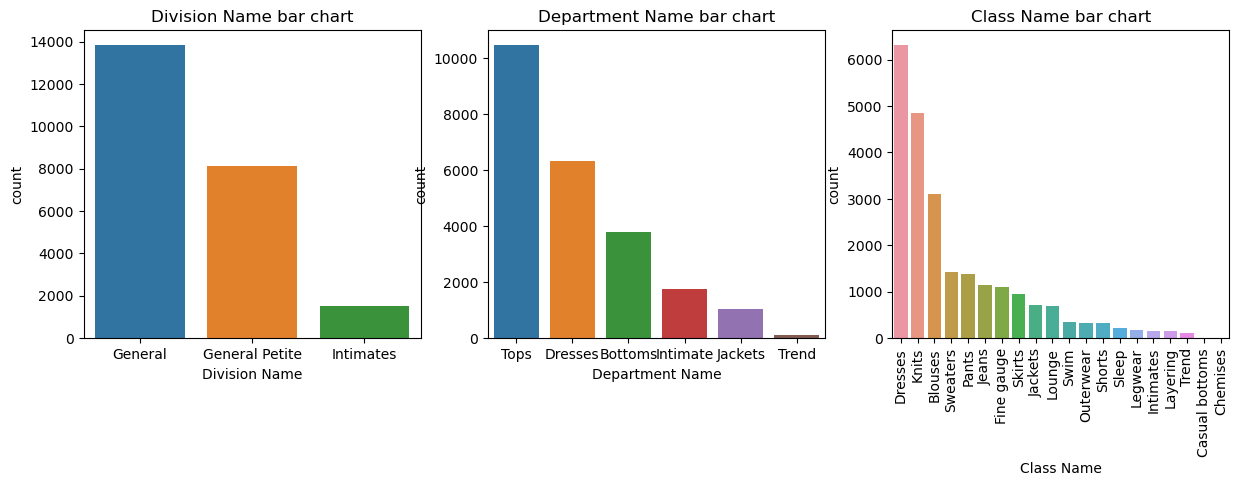

In [15]:
# Defining the figure to look at categorical columns on the same plot
fig = plt.figure(figsize=(20,4))
             
# Iterating through categorical columns and creating bar charts
for i, col in enumerate(cat_cols):
    plt.subplot(1,4,i+1)
    plt.title(col+' bar chart')
    sns.countplot(data=data, x=col, order = data[col].value_counts().index)
    if col == 'Class Name':
        plt.xticks(rotation=90)

#### Observations:
- Here we can see that most items reviewed were under the `General` division. The other two categories are `General Petite` and `Intimates`, which implies that perhaps one of the vendor's target market is petite women.
- We can see that the most reviewed items were tops. Here tops refers to all items that are worn on the upper body (not just t-shirts)
- The most reviewed items were dresses.

### 2.3 Looking at number of words in reviews and titles

Lets look at the length of reviews and titles and see how these relate to other variables. As we will be doing sentiment anaylsis, rows that contain neither the title or a review are irrelevant to us. Therefore in this EDA we will look at the data which has titles and reviews. We will remove the rows that have no review but leave the rows that don't have a title, as we might be able to do some feature engineering later in the project.


In [16]:
# Removing rows that have no review text
ind_to_drop = data[data['Review Text'].isna()].index
data = data.drop(ind_to_drop, axis=0)

In [17]:
# Some data cleaning for the text columns so that we can find the length of the texts
data['Title'] = data['Title'].fillna('')
data[data['Title'] == ' '] = ''

In [18]:
# Adding new columns to the dataset that contain the length of the respective texts
data['Review Length'] = data['Review Text'].apply(lambda x: len(x.split(' ')))
data['Title Length'] = data['Title'].apply(lambda x: len(x.split(' ')))

In [19]:
# Working out number of reviews title and reviews with no text
no_review = (data[data['Review Text'] == ''].shape[0] / data.shape[0]) * 100
no_title = (data[data['Title'] == ''].shape[0] / data.shape[0]) * 100
print('{:.2f} percent of rows have no review and {:.2f} percent have no title'.format(no_review, no_title))


0.00 percent of rows have no review and 13.10 percent have no title


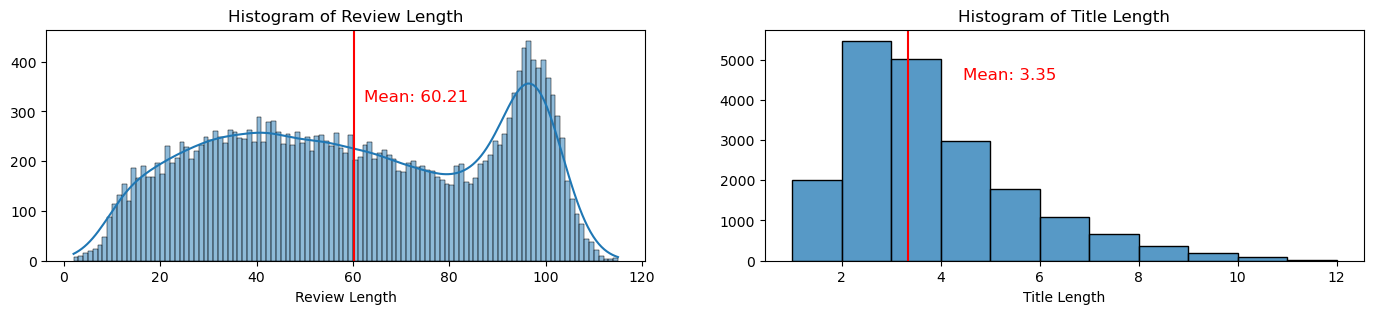

In [20]:
# Creating the figure
fig = plt.figure(figsize=(17,3))

# Subplot for `Review Length`
ax1 = plt.subplot(1,2,1)
sns.histplot(data=data, x='Review Length', bins=np.ptp(data['Review Length']), kde=True)
plt.title('Histogram of Review Length')
plt.ylabel('')

# Add mean line for `Review Length`
mean_length = data['Review Length'].mean()
ax1.axvline(mean_length, color='red', label='Mean')
plt.text(mean_length + 2, 320, f"Mean: {mean_length:.2f}", color='red', fontsize=12)

# Subplot for `Title Length`
ax2 = plt.subplot(1,2,2)
sns.histplot(data=data[data['Title'] != ''], x='Title Length', binwidth=1)
plt.title('Histogram of Title Length')
plt.ylabel('')

# Add mean line for `Title Length` (not including titles with length 0)
mean_title_length = data[data['Title'] != '']['Title Length'].mean()
ax2.axvline(mean_title_length, color='red', label='Mean')
plt.text(mean_title_length + 1.1, 4500, f"Mean: {mean_title_length:.2f}", color='red', fontsize=12)

plt.show()


#### Note:
- In the above histograms the reviews without any text had already been removed from the dataset and the reviews without a title were not considered in the histogram looking at title length. 13.10% of reviews had no title.

#### Observations:
- We can see that the review length is not normally distributed. It looks like it could be made up of two normal distributions that are combined. I will investigate this further below.
- The title length has a normal distribution and is skewed to the right.

In [21]:
data['Rating Class'] = data['Rating'].map({
    5: 'Positive',
    4: 'Positive',
    3: 'Neutral',
    2: 'Negative',
    1: 'Negative'
})

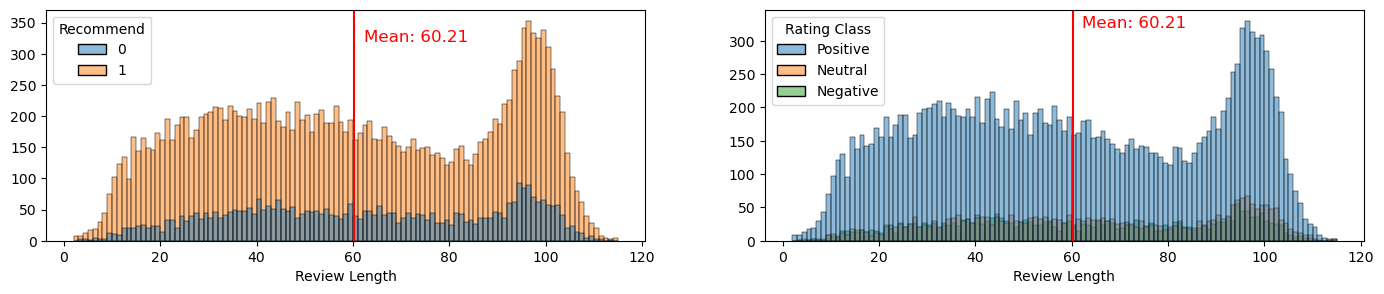

In [22]:
# Creating the figure
fig = plt.figure(figsize=(17,3))

# Subplot for `Review Length`
ax1 = plt.subplot(1,2,1)
sns.histplot(data=data[data['Review Length'] > 1], x='Review Length', bins=np.ptp(data['Review Length']), hue='Recommend')
plt.title('')
plt.ylabel('')

# Add mean line for `Review Length`
mean_length = data['Review Length'].mean()
ax1.axvline(mean_length, color='red', label='Mean')
plt.text(mean_length + 2, 320, f"Mean: {mean_length:.2f}", color='red', fontsize=12)


# Subplot for `Review Length`
ax1 = plt.subplot(1,2,2)
sns.histplot(data=data[data['Review Length'] > 1], x='Review Length', bins=np.ptp(data['Review Length']), hue='Rating Class')
plt.title('')
plt.ylabel('')

# Add mean line for `Review Length`
mean_length = data['Review Length'].mean()
ax1.axvline(mean_length, color='red', label='Mean')
plt.text(mean_length + 2, 320, f"Mean: {mean_length:.2f}", color='red', fontsize=12)

plt.show()

Here we can see that in general positive reviews and reviews that also contain a recommendation can sometimes have a greater number of words in the review text, leading to this second peak around 95 words. We see this second peak also in negative reviews or reviews that done contain a recommendation, however it is less pronounced.

Perhaps this could be due to limits on the length of the review. Therefore customers that were going to write reviews longer than the word limit had to shorten there review, leading to this 'artificial' peak.


## 3. Target Variables (5-star review or not)

In [23]:
# Craeting a new column to contain the target variable
data['Five Star'] = data['Rating'].apply(lambda x: 1 if x==5 else 0)

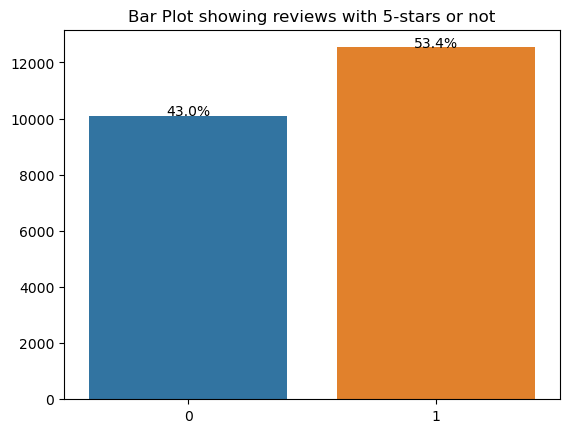

In [24]:
# barplot for the target variable
ax = sns.countplot(data=data, x='Five Star')
plt.title('Bar Plot showing reviews with 5-stars or not')
plt.xlabel('')
plt.ylabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+0.5, '{:.1%}'.format(height/total), ha="center")

**Observations**:
 - We can see that 56% of reviews gave a 5 star rating and 44% gave a 4-star or less rating. This means that the target variable is slightly unbalanced. This will have to be accounted for in the final sentiment analysis model.

## 4. Light Cleaning and Saving the Dataset

In [25]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommend,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length,Title Length,Rating Class,Five Star
0,767,33,,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Intimates,Intimate,Intimates,8,1,Positive,0
1,1080,34,,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,67,1,Positive,1
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses,98,4,Neutral,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,3,Positive,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,36,2,Positive,1


Now that we have performed EDA on the dataset, we will move on to building our Word2Vec model before building the sentiment analysis model. Therefore we can remove some columns from the dataset that are irrelevent to the rest of the project.

In [26]:
# Creating a datasubset that will be used in the rest of the project
data_subset = data[['Title', 'Review Text', 'Five Star']].reset_index(drop=True)

# Checking for missing values in the data subset
data_subset.isna().sum()

Title          0
Review Text    0
Five Star      0
dtype: int64

In [27]:
data_subset.head()

,Title,Review Text,Five Star
0,,Absolutely wonderful - silky and sexy and comfortable,0
1,,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",1
2,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1


Note that there is still missing data in the 'Title' column but it is stored as an empty string instead of null value.

In [28]:
no_title_perc = round(len(data_subset[data_subset['Title'] == '']) / data_subset.shape[0] * 100, 2)
print(f'There are {no_title_perc}% of reviews missing a title in the data subset')

There are 13.1% of reviews missing a title in the data subset


In [29]:
data_subset.to_csv('reviews_cleaned.csv', index=True)

# TODO:
- Read through notebook
    - Does all the writing make sense
    - Are the graphs informative and visually pleasing
    - Is the notebook well organised?
        - Do the headings and their numbers make sense
        - Should I add a table of contents
- Add a conclusions section?